# **Using yfinace to analyse stocks**

This notebook uses the Python library Yfinance to analyse stock prices and the variables around them.

## Installing the libraries

In [ ]:
!pip install yfinance
!pip install nbformat


In [10]:
!mamba install bs4==4.10.0 -y


Transaction

  Prefix: C:\Users\humaa\anaconda3

  Updating specs:

   - bs4==4.10.0
   - ca-certificates
   - certifi
   - openssl


  Package               Version  Build            Channel           Size
--------------------------------------------------------------------------
  Install:
--------------------------------------------------------------------------

  + bs4                  4.10.0  hd3eb1b0_0       pkgs/main         10kB

  Upgrade:
--------------------------------------------------------------------------

  - ca-certificates   2023.7.22  h56e8100_0       conda-forge     Cached
  + ca-certificates  2023.08.22  haa95532_0       pkgs/main       Cached

  Downgrade:
--------------------------------------------------------------------------

  - beautifulsoup4       4.12.2  py311haa95532_0  pkgs/main       Cached
  + beautifulsoup4       4.10.0  pyh06a4308_0     pkgs/main         87kB

  Summary:

  Install: 1 packages
  Upgrade: 1 packages
  Downgrade: 1 packages

  Tota

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Extracting stock data

We use the **Ticker** function. The strings 'AAPL' or 'AMZN' etc. are the tickers that represent the corporations' names. 

In [7]:
apple = yf.Ticker('AAPL')
amazon = yf.Ticker('AMZN')
samsung = yf.Ticker('SSNLF')
dowjones = yf.Ticker('DJIA')

Next, we use the **history** function to set our time limit. If you want to go further back in time, you can always set the period value to a higher number, or simply use **period = 'max'** to extract the full range.

In [10]:
print(apple)

yfinance.Ticker object <AAPL>


In [8]:
apple_share = apple.history(period='10y')
apple_share.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-10-07 00:00:00-04:00,15.165920,15.355742,15.128204,15.203012,312292400,0.0,0.0
2013-10-08 00:00:00-04:00,15.271273,15.293093,14.978279,14.990747,290917200,0.0,0.0
2013-10-09 00:00:00-04:00,15.106070,15.204254,14.907831,15.166851,301725200,0.0,0.0
2013-10-10 00:00:00-04:00,15.314285,15.347323,15.180878,15.261919,278602800,0.0,0.0
2013-10-11 00:00:00-04:00,15.179325,15.392837,15.122285,15.360733,267738800,0.0,0.0


We reset the index.

In [11]:
apple_share.reset_index(inplace=True)
apple_share.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-10-07 00:00:00-04:00,15.165920,15.355742,15.128204,15.203012,312292400,0.0,0.0
1,2013-10-08 00:00:00-04:00,15.271273,15.293093,14.978279,14.990747,290917200,0.0,0.0
2,2013-10-09 00:00:00-04:00,15.106070,15.204254,14.907831,15.166851,301725200,0.0,0.0
3,2013-10-10 00:00:00-04:00,15.314285,15.347323,15.180878,15.261919,278602800,0.0,0.0
4,2013-10-11 00:00:00-04:00,15.179325,15.392837,15.122285,15.360733,267738800,0.0,0.0


Now we can play with many different possibilities.

<Axes: xlabel='Date'>

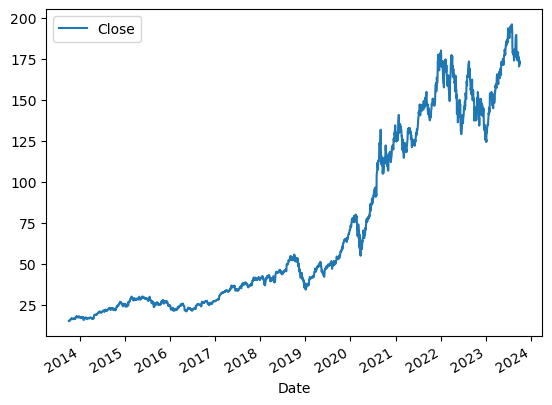

In [13]:
apple_share.plot(x='Date',y='Close')

Checking how often Dividends were paid

In [16]:
apple_share[apple_share.Dividends>0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
22,2013-11-06 00:00:00-05:00,16.432970,16.455231,16.246428,16.331705,223375600,0.108929,0.0
84,2014-02-06 00:00:00-05:00,16.086950,16.195446,16.015985,16.164221,257765200,0.108929,0.0
147,2014-05-08 00:00:00-04:00,18.656633,18.852002,18.597960,18.648388,230297200,0.117500,0.0
210,2014-08-07 00:00:00-04:00,21.180089,21.407663,20.994905,21.079689,186844000,0.117500,0.0
274,2014-11-06 00:00:00-05:00,24.335106,24.377682,24.155843,24.357513,139874000,0.117500,0.0
335,2015-02-05 00:00:00-05:00,27.000238,27.047482,26.827017,26.982243,168984800,0.117500,0.0
398,2015-05-07 00:00:00-04:00,28.186068,28.482004,28.016640,28.296762,175763600,0.130000,0.0
461,2015-08-06 00:00:00-04:00,26.316693,26.436964,25.896879,26.126074,211612000,0.130000,0.0
525,2015-11-05 00:00:00-05:00,27.769381,27.960817,27.388792,27.557436,158210800,0.130000,0.0
586,2016-02-04 00:00:00-05:00,21.964855,22.301684,21.811336,22.134415,185886800,0.130000,0.0


In [19]:
amazon_share = amazon.history(period='10y')
amazon_share.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-10-07 00:00:00-04:00,15.7620,15.7670,15.4870,15.5015,41664000,0.0,0.0
2013-10-08 00:00:00-04:00,15.5750,15.5775,15.0135,15.1615,63324000,0.0,0.0
2013-10-09 00:00:00-04:00,15.1710,15.1750,14.8250,14.9115,64948000,0.0,0.0
2013-10-10 00:00:00-04:00,15.2315,15.3350,15.1295,15.2585,51102000,0.0,0.0
2013-10-11 00:00:00-04:00,15.2385,15.5465,15.1920,15.5445,43262000,0.0,0.0


In [20]:
amazon_share.reset_index(inplace=True)

In [21]:
amazon_share.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-10-07 00:00:00-04:00,15.7620,15.7670,15.4870,15.5015,41664000,0.0,0.0
1,2013-10-08 00:00:00-04:00,15.5750,15.5775,15.0135,15.1615,63324000,0.0,0.0
2,2013-10-09 00:00:00-04:00,15.1710,15.1750,14.8250,14.9115,64948000,0.0,0.0
3,2013-10-10 00:00:00-04:00,15.2315,15.3350,15.1295,15.2585,51102000,0.0,0.0
4,2013-10-11 00:00:00-04:00,15.2385,15.5465,15.1920,15.5445,43262000,0.0,0.0


In [27]:
comb = pd.concat([apple_share,amazon_share], keys = ['appl','amzn'])

In [29]:
comb.head()

Date       Open       High        Low      Close  \
appl 0 2013-10-07 00:00:00-04:00  15.165920  15.355742  15.128204  15.203012   
     1 2013-10-08 00:00:00-04:00  15.271273  15.293093  14.978279  14.990747   
     2 2013-10-09 00:00:00-04:00  15.106070  15.204254  14.907831  15.166851   
     3 2013-10-10 00:00:00-04:00  15.314285  15.347323  15.180878  15.261919   
     4 2013-10-11 00:00:00-04:00  15.179325  15.392837  15.122285  15.360733   

           Volume  Dividends  Stock Splits  
appl 0  312292400        0.0           0.0  
     1  290917200        0.0           0.0  
     2  301725200        0.0           0.0  
     3  278602800        0.0           0.0  
     4  267738800        0.0           0.0

In [38]:
apple_share['name'] = 'appl'
amazon_share['name'] = 'amzn'

In [39]:
comb = pd.concat([apple_share,amazon_share], keys = ['appl','amzn'])

In [41]:
comb.head()

Date       Open       High        Low      Close  \
appl 0 2013-10-07 00:00:00-04:00  15.165920  15.355742  15.128204  15.203012   
     1 2013-10-08 00:00:00-04:00  15.271273  15.293093  14.978279  14.990747   
     2 2013-10-09 00:00:00-04:00  15.106070  15.204254  14.907831  15.166851   
     3 2013-10-10 00:00:00-04:00  15.314285  15.347323  15.180878  15.261919   
     4 2013-10-11 00:00:00-04:00  15.179325  15.392837  15.122285  15.360733   

           Volume  Dividends  Stock Splits  name  
appl 0  312292400        0.0           0.0  appl  
     1  290917200        0.0           0.0  appl  
     2  301725200        0.0           0.0  appl  
     3  278602800        0.0           0.0  appl  
     4  267738800        0.0           0.0  appl

In [43]:
comb[(comb.Dividends>0) & (comb.name=='amzn')]

,,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,name
